In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.drop(columns='Cabin',inplace=True)
test.drop(columns='Cabin',inplace=True)

In [10]:
train.drop(columns='PassengerId',inplace=True)
test.drop(columns='PassengerId',inplace=True)

In [11]:
train['Family'] = train['Parch'] + train['SibSp'] + 1
test['Family'] = test['Parch'] + test['SibSp'] + 1

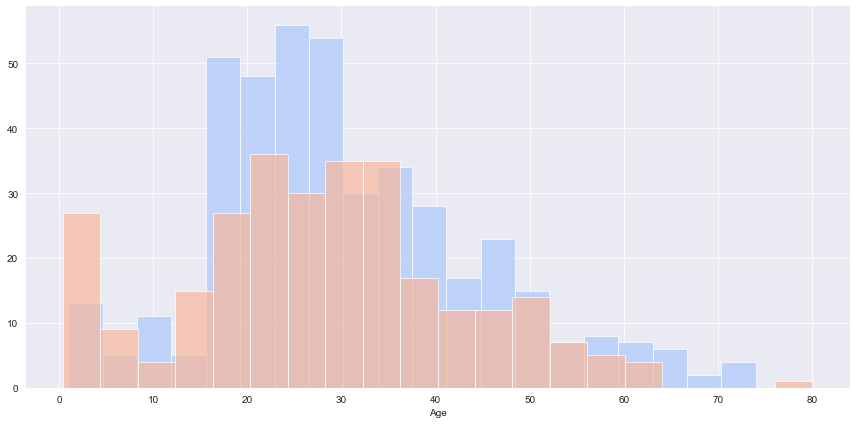

In [12]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data=train, hue='Survived', palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Age', bins=20, alpha=0.7)

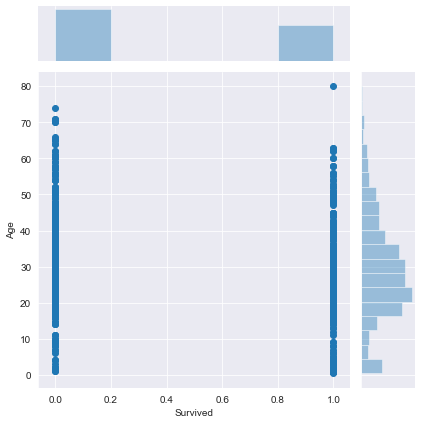

In [15]:
sns.jointplot(x='Survived', y='Age', data=train)

In [16]:
train['Sex'] = train.Sex.map({'male':1 , 'female':0})
test['Sex'] = test.Sex.map({'male':1 , 'female':0})

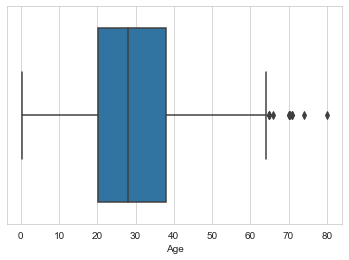

In [19]:
sns.set_style('whitegrid')
ax = sns.boxplot(x=train['Age'])

In [23]:
print(train['Age'].mean())
print(train['Age'].median())
print(train['Age'].mode()[0])

29.69911764705882
28.0
24.0


In [26]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


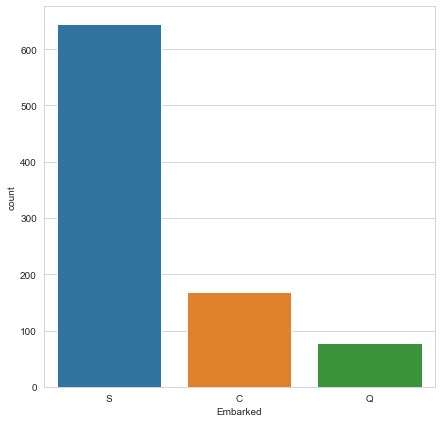

In [38]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x='Embarked', data=train , ax=ax1)

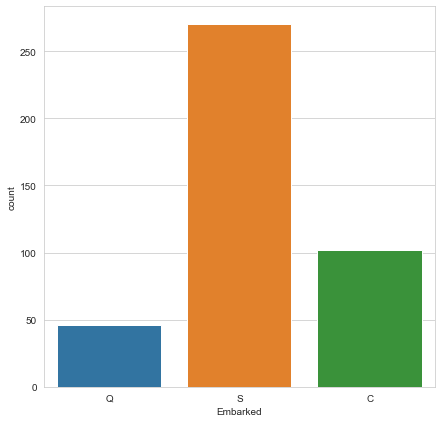

In [41]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x='Embarked', data=test , ax=ax1)

In [43]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [55]:
Embarked_dummies = pd.get_dummies(train['Embarked'])

In [56]:
Embarked_dummies1 = pd.get_dummies(test['Embarked'])

In [57]:
Embarked_dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [65]:
train = pd.concat([train, Embarked_dummies], axis=1, sort=False)

In [66]:
test = pd.concat([test, Embarked_dummies1], axis=1, sort=False)

In [67]:
train.drop(columns='Embarked',inplace=True)
test.drop(columns='Embarked',inplace=True)

In [69]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family,C,Q,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,1,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,0,0,1


In [70]:
train.drop(columns=['Name','Ticket'],inplace=True)
test.drop(columns=['Name','Ticket'],inplace=True)

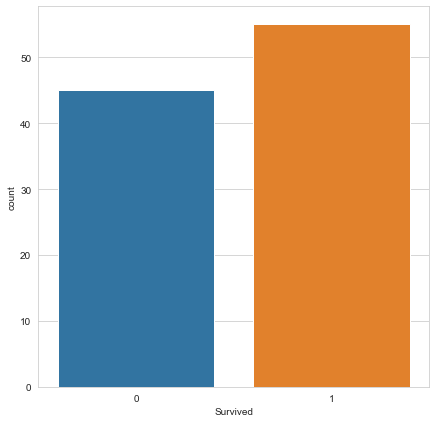

In [79]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x=train[train['Age']<=16]['Survived'], data=train , ax=ax1)

In [93]:
def isChild(Passenger):
    age = Passenger
    return 1 if age < 16 else 0

train['IsChild'] = train['Age'].apply(isChild)
test['IsChild'] = test['Age'].apply(isChild)

In [96]:
train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,C,Q,S,IsChild
0,0,3,1,22.0,1,0,7.2500,2,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,2,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,2,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,1,0,0,1,0
5,0,3,1,28.0,0,0,8.4583,1,0,1,0,0
6,0,1,1,54.0,0,0,51.8625,1,0,0,1,0
7,0,3,1,2.0,3,1,21.0750,5,0,0,1,1
8,1,3,0,27.0,0,2,11.1333,3,0,0,1,0
9,1,2,0,14.0,1,0,30.0708,2,1,0,0,1


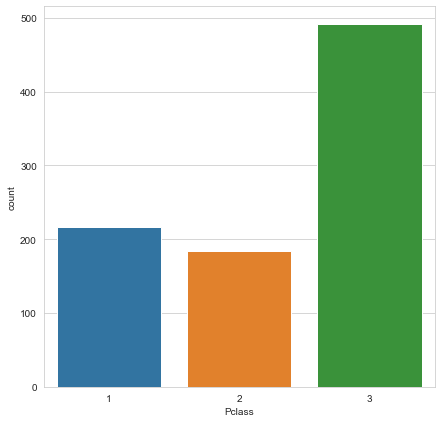

In [97]:
fig , ax1 = plt.subplots(1,1,figsize=(7,7))
sns.countplot(x='Pclass', data=train, ax=ax1)

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Family      891 non-null int64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
IsChild     891 non-null int64
dtypes: float64(2), int64(7), uint8(3)
memory usage: 65.4 KB


In [106]:
train.drop(columns=['Parch','SibSp'],inplace=True)
test.drop(columns=['Parch','SibSp'],inplace=True)

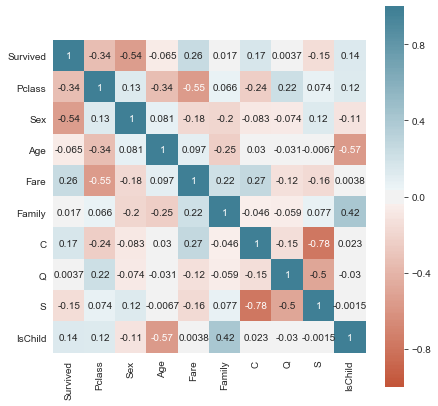

In [127]:
corr = train.corr()
ax = plt.subplots(1,1,figsize=(7,7))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 222, n=200),
    square=True
)


In [132]:
test.isnull().sum()

Pclass     0
Sex        0
Age        0
Fare       1
Family     0
C          0
Q          0
S          0
IsChild    0
dtype: int64

In [140]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [135]:
X_train = train[['Pclass','Sex','Fare','C','IsChild','S']]
y_train = train['Survived']

In [149]:

X_test = test[['Pclass','Sex','Fare','C','IsChild','S']]
X_test['Fare'].astype('float64')

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [150]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

0.9191919191919192

In [143]:
random_forest.score(X_train, y_train)

0.9191919191919192

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)